We begin by looking at the data set cr_loan. In this data set, loan_status shows whether the loan is currently in default with 1 being default and 0 being non-default.

We have more columns within the data, and many could have a relationship with the values in loan_status. You need to explore the data and these relationships more with further analysis to understand the impact of the data on credit loan defaults.

Checking the structure of the data as well as seeing a snapshot helps us better understand what's inside the set. Similarly, visualizations provide a high level view of the data in addition to important trends and patterns.

In [3]:
import pandas as pd
cr_loan = pd.read_csv("/home/ridz/MEGA/Data Camp/Credit Risk Modeling in Python/datasets/cr_loan2.csv" )
display(cr_loan.dtypes)
display(cr_loan.head())

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


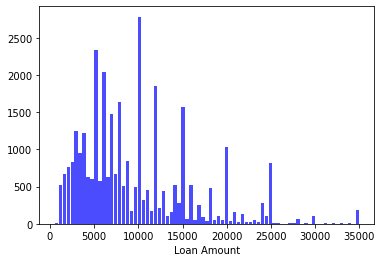

In [4]:
# Look at the distribution of loan amounts with a histogram
import matplotlib.pyplot as plt
import numpy as np
n, bins, patches = plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()
# display(n)
# display(len(bins))
# display(patches)

There are 32 000 rows of data so the scatter plot may take a little while to plot.


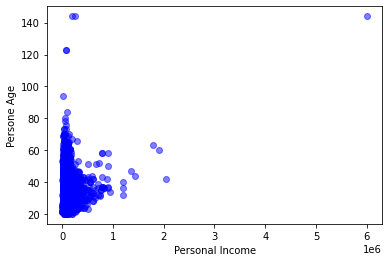

In [5]:
print("There are 32 000 rows of data so the scatter plot may take a little while to plot.")

# Plot a scatter plot of income against age
plt.scatter(cr_loan['person_income'], cr_loan['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Persone Age')
plt.show()

Starting with data exploration helps us keep from getting ahead of ourselves! We can already see a positive correlation with age and income, which could mean these older recipients are further along in their career and therefore earn higher salaries. There also appears to be an outlier in the data.

Often, financial data is viewed as a pivot table in spreadsheets like Excel.

With cross tables, we get a high level view of selected columns and even aggregation like a count or average. For most credit risk models, especially for probability of default, columns like person_emp_length and person_home_ownership are common to begin investigating.

We will be able to see how the values are populated throughout the data, and visualize them. For now, we need to check how loan_status is affected by factors like home ownership status, loan grade, and loan percentage of income.

In [6]:
# Create a cross table of the loan intent and loan status
display(pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status'], margins = True))

loan_status,0,1,All
loan_intent,,,
DEBTCONSOLIDATION,3722,1490,5212
EDUCATION,5342,1111,6453
HOMEIMPROVEMENT,2664,941,3605
MEDICAL,4450,1621,6071
PERSONAL,4423,1098,5521
VENTURE,4872,847,5719
All,25473,7108,32581


In [7]:
# Create a cross table of home ownership, loan status, and grade
display(pd.crosstab(cr_loan['person_home_ownership'],[cr_loan['loan_status'],cr_loan['loan_grade']]))

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27

In [8]:
# Create a cross table of home ownership, loan status, and average percent income
display(pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'],
              values=cr_loan['loan_percent_income'], aggfunc='mean'))

loan_status,0,1
person_home_ownership,,
MORTGAGE,0.146504,0.184882
OTHER,0.143784,0.300000
OWN,0.180013,0.297358
RENT,0.144611,0.264859


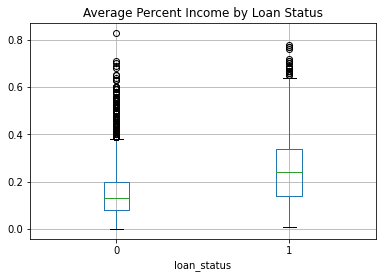

In [9]:
# Create a box plot of percentage income by loan status
cr_loan.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

It looks like the average percentage of income for defaults is higher. This could indicate those recipients have a debt-to-income ratio that's already too high.



It may not be possible for a person to have an employment length of less than 0 or greater than 60. You can use cross tables to check the data and see if there are any instances of this!



In [10]:
# Create the cross table for loan status, home ownership, and the max employment length
display(pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
        values=cr_loan['person_emp_length'], aggfunc='max'))

person_home_ownership,MORTGAGE,OTHER,OWN,RENT
loan_status,,,,
0,123.0,24.0,31.0,41.0
1,34.0,11.0,17.0,123.0


In [11]:
# Create an array of indices where employment length is greater than 60
indices = cr_loan[cr_loan['person_emp_length'] > 60].index

# Drop the records from the data based on the indices and create a new dataframe
cr_loan_new = cr_loan.drop(indices)

# Create the cross table from earlier and include minimum employment length
display(pd.crosstab(cr_loan_new['loan_status'],cr_loan_new['person_home_ownership'],
            values=cr_loan_new['person_emp_length'], aggfunc=['min','max']))

min                      max                  
person_home_ownership MORTGAGE OTHER  OWN RENT MORTGAGE OTHER   OWN  RENT
loan_status                                                              
0                          0.0   0.0  0.0  0.0     38.0  24.0  31.0  41.0
1                          0.0   0.0  0.0  0.0     34.0  11.0  17.0  27.0

Off to a great start! Generally with credit data, key columns like person_emp_length are of high quality, but there is always room for error. With this in mind, we build our intuition for detecting outliers!

We discovered outliers in person_emp_length where values greater than 60 were far above the norm. person_age is another column in which a person can use a common sense approach to say it is very unlikely that a person applying for a loan will be over 100 years old.

Visualizing the data here can be another easy way to detect outliers. We can use other numeric columns like loan_amnt and loan_int_rate to create plots with person_age to search for outliers.

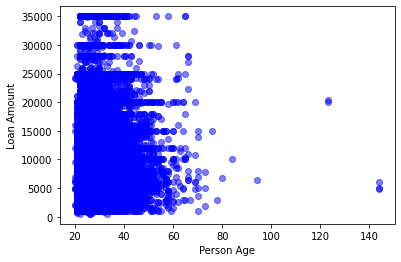

In [12]:

# Create the scatter plot for age and amount
plt.scatter(cr_loan['person_age'], cr_loan['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

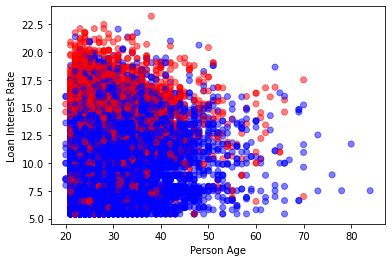

In [13]:
# Use Pandas to drop the record from the data frame and create a new one
import matplotlib
cr_loan_new = cr_loan.drop(cr_loan[cr_loan['person_age'] > 100].index)

# Create a scatter plot of age and interest rate
colors = ["blue","red"]
plt.scatter(cr_loan_new['person_age'], cr_loan_new['loan_int_rate'],
            c = cr_loan_new['loan_status'],
            cmap = matplotlib.colors.ListedColormap(colors),
            alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()

Notice that in the last plot we have loan_status as a label for colors. This shows a different color depending on the class. In this case, it's loan default and non-default, and it looks like there are more defaults with high interest rates.

Now, we should check for missing data. If we find missing data within loan_status, we would not be able to use the data for predicting probability of default because we wouldn't know if the loan was a default or not. Missing data within person_emp_length would not be as damaging, but would still cause training errors.

So, check for missing data in the person_emp_length column and replace any missing values with the median.



Index(['person_emp_length', 'loan_int_rate'], dtype='object')
     person_age  person_income person_home_ownership  person_emp_length  \
105          22          12600              MORTGAGE                NaN   
222          24         185000              MORTGAGE                NaN   
379          24          16800              MORTGAGE                NaN   
407          25          52000                  RENT                NaN   
408          22          17352              MORTGAGE                NaN   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
105           PERSONAL          A       2000           5.42            1   
222          EDUCATION          B      35000          12.42            0   
379  DEBTCONSOLIDATION          A       3900            NaN            1   
407           PERSONAL          B      24000          10.74            1   
408          EDUCATION          C       2250          15.27            0   

     loan_percent_income cb_pe

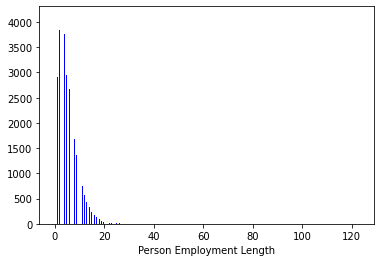

In [14]:
# Print an array of columns with null values
print(cr_loan.columns[cr_loan.isnull().any()])

# Print the top five rows with nulls for employment length
print(cr_loan[cr_loan['person_emp_length'].isnull()].head())

# Replace the null values with the median value for all employment lengths
cr_loan['person_emp_length'].fillna((cr_loan['person_emp_length'].median()), inplace=True)


# Create a histogram of employment length
n, bins, patches = plt.hist(cr_loan['person_emp_length'], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.show()

We can use several different functions like mean() and median() to replace missing data. The goal here is to keep as much of our data as we can! It's also important to check the distribution of that feature to see if it changed.

We replaced missing data in person_emp_length, but in the previous exercise you saw that loan_int_rate has missing data as well.

Similar to having missing data within loan_status, having missing data within loan_int_rate will make predictions difficult.

Because interest rates are set by our company, having missing data in this column is very strange. It's possible that data ingestion issues created errors, but we cannot know for sure. For now, it's best to .drop() these records before moving forward.

In [15]:
# Print the number of nulls
print(cr_loan['loan_int_rate'].isnull().sum())

# Store the array on indices
indices = cr_loan[cr_loan['loan_int_rate'].isnull()].index

# Save the new data without missing data
cr_loan_clean = cr_loan.drop(indices)

3116


Now that the missing data and outliers have been processed, the data is ready for modeling! More often than not, financial data is fairly tidy, but it's always good to practice preparing data for analytical work.

In [16]:
# Count the number of records for each unique value
cr_loan_clean['person_home_ownership'].value_counts()


RENT        14893
MORTGAGE    12122
OWN          2356
OTHER          94
Name: person_home_ownership, dtype: int64

We already have an all-inclusive class within person_home_ownership that stores all other types of home ownership as Other. With this, we eliminate missing data without affecting the data as a whole.

We've now cleaned up the data and created the new data set cr_loan_clean.

Think back to the final scatter plot which showed more defaults with high loan_int_rate. Interest rates are easy to understand, but how useful are they for predicting the probability of default?

Since we haven't tried predicting the probability of default yet, we can test out creating and training a logistic regression model with just loan_int_rate. Also let's check the model's internal parameters, which are like settings, to see the structure of the model with this one column.

In [20]:
from sklearn.linear_model import LogisticRegression 
# Create the X and y data sets
X = cr_loan_clean[['loan_int_rate']]
y = cr_loan_clean[['loan_status']]

# Create and fit a logistic regression model
clf_logistic_single = LogisticRegression(solver='lbfgs')
clf_logistic_single.fit(X, np.ravel(y))

# Print the parameters of the model
display(clf_logistic_single.get_params())

# Print the intercept of the model
display(clf_logistic_single.intercept_)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

array([-4.4586918])

We're on your way to making predictions! Notice that the model was able to fit to the data, and establish some parameters internally. It's even produced an intercept. Generally, we won't use only loan_int_rate to predict the probability of default. We will want to use all the data we have to make predictions.

With this in mind, we'll try training a new model with different columns, called features, from the cr_loan_clean data. Will this model differ from the first one? For this, we can easily check the .intercept_ of the logistic regression. Remember that this is the y-intercept of the function and the overall log-odds of non-default.

In [22]:
# Create X data for the model
X_multi = cr_loan_clean[['loan_int_rate','person_emp_length']]

# Create a set of y data for training
y = cr_loan_clean[['loan_status']]

# Create and train a new logistic regression
clf_logistic_multi = LogisticRegression(solver='lbfgs').fit(X_multi, np.ravel(y))

# Print the intercept of the model
display(clf_logistic_multi.intercept_)

array([-4.2253171])

Take a closer look at each model's intercept value. The values have changed! The new clf_logistic_multi model has an intercept value closer to zero. This means the log odds of a non-default is approaching zero.

We've just trained LogisticRegression() models on different columns.

We know that the data should be separated into training and test sets. test_train_split() is used to create both at the same time. The training set is used to make predictions, while the test set is used for evaluation. Without evaluating the model, we have no way to tell how well it will perform on new loan data.

In addition to the intercept, which is an attribute of the model, LogisticRegression() models also have the .coef_ attribute. This shows how important each training column is for predicting the probability of default

In [28]:
from sklearn.model_selection import train_test_split
# Create the X and y data sets
X = cr_loan_clean[['loan_int_rate','person_emp_length','person_income']]
y = cr_loan_clean[['loan_status']]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Create and fit the logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Print the models coefficients
display(clf_logistic.coef_)

array([[ 8.34020099e-02, -6.02470833e-02, -3.28983416e-05]])

The three values in .coef_ tell us how important each column, or feature, was for predicting. The more positive the value, the more it predicts defaults. Look at the value for loan_int_rate.

With this understanding of the coefficients of a LogisticRegression() model, we'll have a closer look at them to see how they change depending on what columns are used for training. Will the column coefficients change from model to model?

We should .fit() two different LogisticRegression() models on different groups of columns to check. You should also consider what the potential impact on the probability of default might be.

In [36]:
X1 = cr_loan_clean[['person_income','person_emp_length','loan_amnt']]
X2 = cr_loan_clean[['person_income','loan_percent_income','cb_person_cred_hist_length']]
y = cr_loan_clean[['loan_status']]

# Use test_train_split to create the training and test sets
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=.4, random_state=123)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=.4, random_state=123)

# Print the first five rows of each training set
display(X1_train.head())
display(X2_train.head())

# Create and train a model on the first training data
clf_logistic1 = LogisticRegression(solver='lbfgs').fit(X1_train, np.ravel(y_train))

# Create and train a model on the second training data
clf_logistic2 = LogisticRegression(solver='lbfgs').fit(X2_train, np.ravel(y_train))

# Print the coefficients of each model
display(clf_logistic1.coef_)
display(clf_logistic2.coef_)

,person_income,person_emp_length,loan_amnt
25231,81900,13.0,8000
25262,47700,2.0,12000
21498,48000,6.0,5000
1774,19200,2.0,2000
11441,75000,7.0,10200


,person_income,loan_percent_income,cb_person_cred_hist_length
25231,81900,0.10,10
25262,47700,0.25,5
21498,48000,0.10,10
1774,19200,0.10,4
11441,75000,0.14,2


array([[-4.12423659e-05, -2.25772815e-08,  1.09365478e-04]])

array([[-2.20252017e-05,  1.90718041e-10, -1.75399456e-09]])

Interesting! Notice that the coefficient for the person_income changed when we changed the data from X1 to X2. This is a reason to keep most of the data rather than subsetting it into multiple chunks, because the models will learn differently depending on what data they're given!

It's time to prepare the non-numeric columns so they can be added to your LogisticRegression() model.

Once the new columns have been created using one-hot encoding, you can concatenate them with the numeric columns to create a new data frame which will be used through the end from now.

Remember we only one-hot encode the non-numeric columns. Doing this to the numeric columns would create an incredibly wide data set!

In [39]:
# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
cred_str_onehot = pd.get_dummies(cred_str)

# Union the one-hot encoded columns to the numeric ones
cr_loan_prep = pd.concat([cred_num, cred_str_onehot], axis=1)

# Print the columns in the new data set
display(cr_loan_prep.columns)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')

All of the data processing is complete and it's time to begin creating predictions for probability of default. We want to train a LogisticRegression() model on the data, and examine how it predicts the probability of default.

So that we can better grasp what the model produces with predict_proba, we should look at an example record alongside the predicted probability of default. How do the first five predictions look against the actual values of loan_status?

In [42]:
# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
display(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

,loan_status,prob_default
0,0,0.203595
1,0,0.137401
2,0,0.119622
3,0,0.307440
4,0,0.505785


We have some predictions now, but they don't look very accurate. It looks like most of the rows with loan_status at 1 have a low probability of default. Let's see if we can determine how accurate the entire model is.

It's time to take a closer look at the evaluation of the model. Here is where setting the threshold for probability of default will help us analyze the model's performance through classification reporting.

Creating a data frame of the probabilities makes them easier to work with, because we can use all the power of pandas. Let's apply the threshold to the data and check the value counts for both classes of loan_status to see how many predictions of each are being created. This will help with insight into the scores from the classification report.

In [60]:
from sklearn.metrics import *
# Create a dataframe for the probabilities of default
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.50 else 0)

# Print the row counts for each loan status
print(preds_df['loan_status'].value_counts())

# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

0    10861
1      925
Name: loan_status, dtype: int64
              precision    recall  f1-score   support

 Non-Default       0.81      0.96      0.88      9194
     Default       0.62      0.22      0.33      2592

    accuracy                           0.80     11786
   macro avg       0.72      0.59      0.61     11786
weighted avg       0.77      0.80      0.76     11786



In [ ]:
It looks like almost all of our test set was predicted to be non-default. The recall for defaults is 0.16 meaning 16% of our true defaults were predicted correctly.

In [51]:
# Print all the non-average values from the report
print(precision_recall_fscore_support(y_test,preds_df['loan_status']))

(array([0.81447381, 0.62378378]), array([0.96214923, 0.22260802]), array([0.88217402, 0.32812056]), array([9194, 2592]))


In [52]:
# Print the first two numbers from the report
print(precision_recall_fscore_support(y_test,preds_df['loan_status'])[0])

[0.81447381 0.62378378]


Now, we want to visualize the performance of the model. In ROC charts, the X and Y axes are two metrics we've already looked at: the false positive rate (fall-out), and the true positive rate (sensitivity).

We can create a ROC chart of it's performance with the following code:



0.7995078907178008


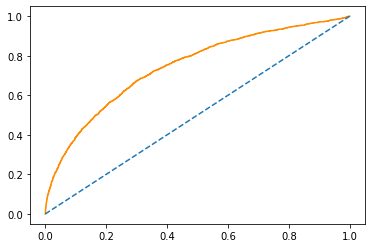

In [58]:
# Create predictions and store them in a variable
preds = clf_logistic.predict_proba(X_test)

# Print the accuracy score the model
print(clf_logistic.score(X_test, y_test))

# Plot the ROC curve of the probabilities of default
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Compute the AUC and store it in a variable
auc = roc_auc_score(y_test, prob_default)

So the accuracy for this model is about 80% and the AUC score is 76%. Notice that what the ROC chart shows us is the tradeoff between all values of our false positive rate (fallout) and true positive rate (sensitivity).

We've looked at setting thresholds for defaults, but how does this impact overall performance? To do this, you can start by looking at the effects with confusion matrices.

Set different values for the threshold on probability of default, and use a confusion matrix to see how the changing values affect the model's performance.


In [62]:
# Set the threshold for defaults to 0.5
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Print the confusion matrix
display(confusion_matrix(y_test,preds_df['loan_status']))

array([[8846,  348],
       [2015,  577]])

In [64]:
# Set the threshold for defaults to 0.4
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Print the confusion matrix
display(confusion_matrix(y_test,preds_df['loan_status']))

array([[8074, 1120],
       [1477, 1115]])

The value for default recall at this threshold=0.4 is actually pretty high! We can check out the non-default recalls as well to see how the threshold affected those values.

Setting the threshold to 0.4 shows promising results for model evaluation. Now we can assess the financial impact using the default recall which is selected from the classification reporting. For this, we will estimate the amount of unexpected loss using the default recall to find what proportion of defaults we did not catch with the new threshold. This will be a dollar amount which tells you how much in losses you would have if all the unfound defaults were to default all at once.

In [74]:
#Calculate the average loan_amnt
avg_loan_amnt = np.mean(cr_loan_clean['loan_amnt'])
# Reassign the values of loan status based on the new threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Store the number of loan defaults from the prediction data
num_defaults = preds_df['loan_status'].value_counts()[1]

# Store the default recall from the classification report
default_recall = precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][1]

# Calculate the estimated impact of the new default recall rate
print("estimated loss on defaults:" + str(num_defaults * avg_loan_amnt * (1 - default_recall)) + "\n total loan amount: "+ str(np.sum(cr_loan_clean['loan_amnt'])))

estimated loss on defaults:12206848.964421853
 total loan amount: 282414500


That's still a big amount but the predictictions could be improved to a greater extent if we use decision trees in the place of logistic regression which I'm planning to do in the future.